In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearnex import patch_sklearn, unpatch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
df = pd.read_csv("./grouped_sku_sales_4.csv")

In [4]:
# features = ['salable_status', 'original_price', 'weather_type', 'min_temperature', 'max_temperature']
features = ['original_price', 'weather_type', 'min_temperature', 'max_temperature', 'promotion_type', 'threshold', 'discount_off', 
           'curr_day_ratio']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [11]:
df

,date,store_id,sku_id,channel,salable_status,original_price,weather_type,min_temperature,max_temperature,promotion_type,threshold,discount_off,curr_day_ratio,quantity
0,2021-08-31,1,2,1,1.0,-0.261558,-0.153014,0.832845,0.700024,-0.626760,-0.545751,-0.626759,-0.593328,5.0
1,2021-08-31,1,2,2,1.0,-0.261558,-0.153014,0.832845,0.700024,-0.626760,-0.545751,-0.626759,-0.593328,1.0
2,2021-08-31,1,3,1,1.0,-0.356545,-0.153014,0.832845,0.700024,-0.626760,-0.545751,-0.626759,-0.593328,8.0
3,2021-08-31,1,3,2,1.0,-0.356545,-0.153014,0.832845,0.700024,-0.626760,-0.545751,-0.626759,-0.593328,2.0
4,2021-08-31,1,5,1,1.0,-0.912903,-0.153014,0.832845,0.700024,1.799119,0.526168,0.532944,0.495613,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184656,2023-08-31,12,997,1,1.0,0.023406,-0.296272,0.735575,0.605171,-0.626760,-0.545751,-0.626759,-0.593328,2.0
4184657,2023-08-31,12,999,1,1.0,-0.234418,-0.296272,0.735575,0.605171,-0.626760,-0.545751,-0.626759,-0.593328,2.0
4184658,2023-08-31,12,999,2,1.0,-0.234418,-0.296272,0.735575,0.605171,-0.626760,-0.545751,-0.626759,-0.593328,2.0
4184659,2023-08-31,12,1000,1,1.0,1.027563,-0.296272,0.735575,0.605171,-0.626760,-0.545751,-0.626759,-0.593328,1.0


In [6]:
pca = PCA()
pca.fit(df[features])
explained_variance_ratio = pca.explained_variance_ratio_

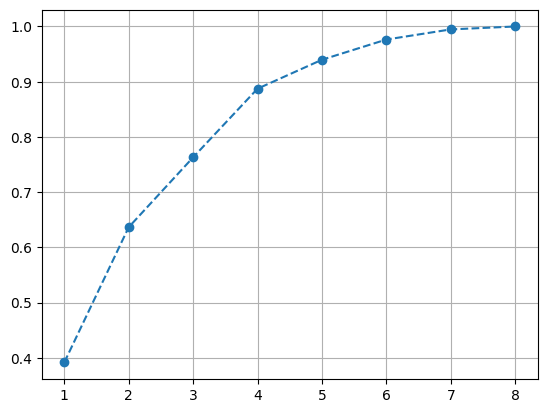

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.grid()
plt.show()

In [8]:
# 选择要保留的主成分数量
n_components_to_keep = 5

# 创建新的PCA模型并降维
pca = PCA(n_components=n_components_to_keep)
reduced_data = pca.fit_transform(df[features])
# reduced_data可以直接作为新的数据集

In [9]:
pca.components_

array([[ 6.15083397e-02,  3.96624094e-03,  3.68051906e-02,
         3.75233420e-02,  5.10258639e-01,  4.58087262e-01,
         5.25197819e-01,  4.97390996e-01],
       [-1.62052466e-02,  8.52353225e-02,  7.04852856e-01,
         7.02093782e-01, -3.07307112e-02, -2.44404524e-02,
        -2.65941639e-02, -2.16827150e-02],
       [ 9.81067314e-01, -1.06408720e-02,  9.34576982e-03,
         1.05096450e-02,  7.79679962e-02, -1.73838510e-01,
        -1.69839286e-02, -2.46700513e-02],
       [ 1.17097394e-02,  9.95281043e-01, -2.85987658e-02,
        -9.18191388e-02,  2.64053722e-03, -2.59582674e-04,
         1.60215290e-03, -4.50293575e-03],
       [ 1.76605985e-01, -8.31923979e-04, -1.16669347e-03,
         3.96706688e-03, -4.19198359e-01,  8.51864674e-01,
        -2.00836293e-01, -1.64489000e-01]])

In [10]:
column_names = ['x1', 'x2', 'x3', 'x4', 'x5']
out = pd.DataFrame(reduced_data, columns=column_names)

In [12]:
out['quantity'] = df['quantity']
out[['date', 'store_id', 'sku_id', 'channel']] = df[['date', 'store_id', 'sku_id', 'channel']]
out = out[['date', 'store_id', 'sku_id', 'channel', 'x1', 'x2', 'x3', 'x4', 'x5', 'quantity']]

In [14]:
out.to_csv("grouped_sku_sales_PCAed.csv", index = False)